##  1 Data wrangling<a id='1_Data_wrangling'></a>

### 1.1 Contents<a id='1.1_Contents'></a>
* [1 Data wrangling](#2_Data_wrangling)
  * [1.1 Contents](#2.1_Contents)
  * [1.2 Introduction to American Express Credit Default Project](#1.2_Introduction_to_American_Express_Credit_Default_Project)
    * [1.2.1 Brief Problem Description](#1.2.1_Brief_Problem_Description)
    * [1.2.2 Introduction To Notebook](#1.2.2_Introduction_To_Notebook)
  * [1.3 Imports](#1.3_Imports)
  * [1.4 Objectives](#1.4_Objectives)
  * [1.5 Data Collection](#1.5_Data_Collection)
  * [1.6 Data Cleaning](#1.6_Data_Cleaning)
  * [1.7 Saving Clean Data](#1.7_Saving_Clean_Data)
  

#### 1.2 Introduction to American Express Credit Default Project<a id='1.2_Introduction to American Express Credit Default Project'></a>



##### 1.2.1 Brief Problem Description<a id='1.2.1_Brief Problem Description'></a>

Credit cards around the world are one of the most common payment methods. People and businesses use them to exchange money for products or services in seconds conveniently. Their (almost) global adoption has solved the need to walk around with large amounts of cash, minimizing customer risks. Nevertheless, credit card issuer companies must address the risk of customers not paying back their balance.

Due to its robust rewards system, individuals and businesses widely use American Express, with a current market cap of $121.80 billion. However, credit card default is a relevant issue in the financing industry. Therefore, this project aims to build a model that predicts the probability of a customer turning to default status (not paying back their balance for 120 days). 

##### 1.2.2 Introduction To Notebook<a id='1.2.2_Introduction To Notebook'></a>

In this notebook, I will be going through the data wrangling process. From loading the data, to cleaning it, defining it and finally organizing it a way that support the next steps in the process. 

##### 1.3 Imports<a id='1.3_Imports'></a>

In [1]:
# import of relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

##### 1.4 Objectives<a id='1.4_Objectives'></a>

The scope of this notebook is the following points:
- Understand the dataset characteristics, variables, range, etc.
- Identify and examine categorical and numerical variables
- Identify missing data and deal with it if appropriate
- Check for data quality and standardize inconsistencies within the variables
- Save the clean dataset to a CSV file in the project's directory

##### 1.5 Data Collection<a id='1.5_Data Collection'></a>

In [2]:
# Loading the csv file
#fn = os.path.join(os.path.dirname(__file__), 'train.csv')
amex_df = pd.read_csv('/Users/camilods16/Documents/Project-2-AmEx-Credit-Card-Default-/Project-2-AmEx-Credit-Card-Default-/data/raw/train.csv', sep=',')

##### 1.6 Data Cleaning<a id='1.6_Data Cleaning'></a>

In [3]:
#calling info() on raw data to have a quick overview of the dataset components
amex_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

There are 19 columns with a range of 45528 entries. Some columns have different number of entries. The following are the column with less entries: 
- owns_car
- no_of_childer
- no_of_days_emplyoyed
- total_family_members
- migrant_worker
- yearly_debt_payments **
- credit_score **

some features stand out just by name: credit score, debt payments and all default-related. 
3 types in the dataset: float, int, object. 

There are columns does not seem to correspond the content stored in them such as no_of_children and migrant_worker. However, in the next steps I will apply methods to define and understan better the dataset.

In [4]:
amex_df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [5]:
# summary statistics for each column
amex_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45528.0,38.993411,9.543990,23.00,31.000,39.000,47.0000,5.500000e+01
no_of_children,44754.0,0.420655,0.724097,0.00,0.000,0.000,1.0000,9.000000e+00
net_yearly_income,45528.0,200655.622249,669074.034607,27170.61,126345.835,171714.910,240603.7600,1.407590e+08
no_of_days_employed,45065.0,67609.289293,139323.524434,2.00,936.000,2224.000,5817.0000,3.652520e+05
total_family_members,45445.0,2.158081,0.911572,1.00,2.000,2.000,3.0000,1.000000e+01
migrant_worker,45441.0,0.179111,0.383450,0.00,0.000,0.000,0.0000,1.000000e+00
yearly_debt_payments,45433.0,31796.965311,17269.727234,2237.47,19231.140,29081.650,40561.1500,3.281129e+05
credit_limit,45528.0,43548.416028,148784.686878,4003.14,23973.805,35688.045,53435.7625,3.112997e+07
credit_limit_used(%),45528.0,52.235020,29.376910,0.00,27.000,54.000,78.0000,9.900000e+01
credit_score,45520.0,782.791257,100.619746,500.00,704.000,786.000,867.0000,9.490000e+02


In [6]:
amex_df.median()

/var/folders/fk/kvpxv24d2ys_slgf4kqk23f40000gn/T/ipykernel_20711/413277450.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  amex_df.median()


age                            39.000
no_of_children                  0.000
net_yearly_income          171714.910
no_of_days_employed          2224.000
total_family_members            2.000
migrant_worker                  0.000
yearly_debt_payments        29081.650
credit_limit                35688.045
credit_limit_used(%)           54.000
credit_score                  786.000
prev_defaults                   0.000
default_in_last_6months         0.000
credit_card_default             0.000
dtype: float64

In [7]:
# missing values per column
missing_val = pd.concat([amex_df.isnull().sum(), 100 * amex_df.isnull().mean()], axis=1)
missing_val.columns=['count', '%']
missing_val.sort_values(by='count', ascending=False)

,count,%
no_of_children,774,1.700053
owns_car,547,1.201458
no_of_days_employed,463,1.016957
yearly_debt_payments,95,0.208663
migrant_worker,87,0.191091
total_family_members,83,0.182305
credit_score,8,0.017572
customer_id,0,0.000000
default_in_last_6months,0,0.000000
prev_defaults,0,0.000000


Missing values per column are minimal. The top 3 are missing 1% to 1.7% of their data. We might consider inputting the missing values in future steps:

no_of_children, owns_car, no_of_days_employed, yearly_debt_payments, migrant_worker, total_family_members.


Categorical Variables:

In [8]:
#Drop the name feature as it is inconsistent and there's a unique identifier for each customer: customer_id.
amex_df.drop('name', axis=1, inplace=True)

In [9]:
# categorical_v = amex_df.select_dtypes(include='object')
# categorical_v
numerical_data = [i for i in amex_df.columns if amex_df[i].dtypes != 'object']
numerical_data = amex_df[numerical_data]
categorical_data = [i for i in amex_df.columns if amex_df[i].dtype == 'object']
categorical_data = amex_df[categorical_data]

In [10]:
categorical_data.head()

,customer_id,gender,owns_car,owns_house,occupation_type
0,CST_115179,F,N,Y,Unknown
1,CST_121920,M,N,Y,Laborers
2,CST_109330,M,N,Y,Laborers
3,CST_128288,F,N,Y,Core staff
4,CST_151355,M,Y,Y,Core staff


In [11]:
# unique values of categorical features
# print(categorical_data['occupation_type'].unique(), categorical_data['gender'].unique())
for i in categorical_data:
    print(categorical_data[i].unique())

['CST_115179' 'CST_121920' 'CST_109330' ... 'CST_145435' 'CST_130913'
 'CST_160078']
['F' 'M' 'XNA']
['N' 'Y' nan]
['Y' 'N']
['Unknown' 'Laborers' 'Core staff' 'Accountants' 'High skill tech staff'
 'Sales staff' 'Managers' 'Drivers' 'Medicine staff' 'Cleaning staff'
 'HR staff' 'Security staff' 'Cooking staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Private service staff' 'Secretaries'
 'Realty agents' 'IT staff']


There are missing values in the 'owns_car' column. Changing categorical variables for binary variables is an option to keep in mind.

In [12]:
# drop customer_id as we do not need it for now
categorical_data.drop('customer_id', axis=1, inplace=True)

/var/folders/fk/kvpxv24d2ys_slgf4kqk23f40000gn/T/ipykernel_20711/3107338600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data.drop('customer_id', axis=1, inplace=True)


In [13]:
for i in categorical_data.columns: 
    print(categorical_data[i].value_counts())

F      29957
M      15570
XNA        1
Name: gender, dtype: int64
N    29743
Y    15238
Name: owns_car, dtype: int64
Y    31642
N    13886
Name: owns_house, dtype: int64
Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking staff              902
Cleaning staff             665
Private service staff      387
Low-skill Laborers         336
Waiters/barmen staff       203
Secretaries                199
Realty agents              101
HR staff                    78
IT staff                    66
Name: occupation_type, dtype: int64


In [14]:
gender_filtered = categorical_data[categorical_data.gender == 'XNA']
gender_filtered

,gender,owns_car,owns_house,occupation_type
28498,XNA,N,Y,Low-skill Laborers


In [15]:
# inputing 'XNA' value as f as it is only one it won't affect the dataset
amex_df['gender']['XNA'] = amex_df['gender'].mode()
amex_df['gender'].value_counts()

/var/folders/fk/kvpxv24d2ys_slgf4kqk23f40000gn/T/ipykernel_20711/2457937044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amex_df['gender']['XNA'] = amex_df['gender'].mode()


F      29957
M      15570
XNA        1
Name: gender, dtype: int64

In [16]:
categorical_data['occupation_type'].value_counts() / len(categorical_data['occupation_type']) * 100

Unknown                  31.407046
Laborers                 17.865929
Sales staff              10.378229
Core staff                8.921982
Managers                  6.958355
Drivers                   6.033650
High skill tech staff     3.694430
Accountants               3.237568
Medicine staff            2.800474
Security staff            2.251362
Cooking staff             1.981198
Cleaning staff            1.460640
Private service staff     0.850026
Low-skill Laborers        0.738007
Waiters/barmen staff      0.445879
Secretaries               0.437094
Realty agents             0.221842
HR staff                  0.171323
IT staff                  0.144966
Name: occupation_type, dtype: float64

30% of values are grouped as 'Unknown', followed by 'Laborers' and 'Sales Staff'. Keep this in mind for future steps in the analysis

In [17]:
# exploring a few rows of the numerical data
numerical_data.tail()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
45523,55,2.0,96207.57,117.0,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,31,0.0,383476.74,966.0,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,27,0.0,260052.18,1420.0,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,32,0.0,157363.04,2457.0,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0
45527,38,1.0,316896.28,1210.0,3.0,0.0,34603.78,36630.76,26,682.0,0,0,0


In [18]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      45528 non-null  int64  
 1   no_of_children           44754 non-null  float64
 2   net_yearly_income        45528 non-null  float64
 3   no_of_days_employed      45065 non-null  float64
 4   total_family_members     45445 non-null  float64
 5   migrant_worker           45441 non-null  float64
 6   yearly_debt_payments     45433 non-null  float64
 7   credit_limit             45528 non-null  float64
 8   credit_limit_used(%)     45528 non-null  int64  
 9   credit_score             45520 non-null  float64
 10  prev_defaults            45528 non-null  int64  
 11  default_in_last_6months  45528 non-null  int64  
 12  credit_card_default      45528 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 4.5 MB


/var/folders/fk/kvpxv24d2ys_slgf4kqk23f40000gn/T/ipykernel_20711/3044718097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data.drop('credit_card_default', axis=1, inplace=True)


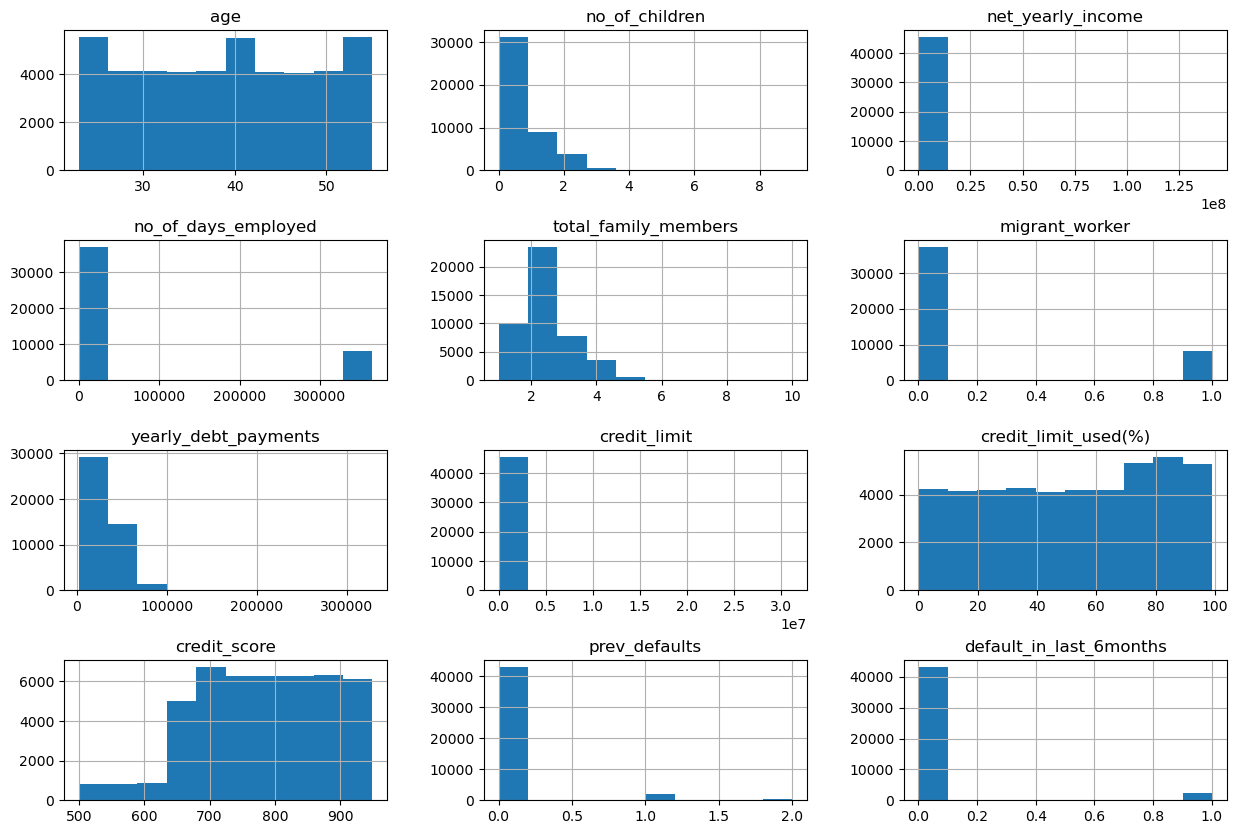

In [19]:
# separating the credit card default feature and plotting the distribution of the numerical variables to explore
train_y = numerical_data['credit_card_default']
numerical_data.drop('credit_card_default', axis=1, inplace=True)
numerical_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Some of the numerical features show odd distributions: default_in_last_6months, prev_defaults, no_of_employed, migrant_worker. Exploring more these values will clarify if they should be treated as binary variables. 

Credit_limit and net_yearly_income are showing the gap between the customers. 

Looking for outliers:

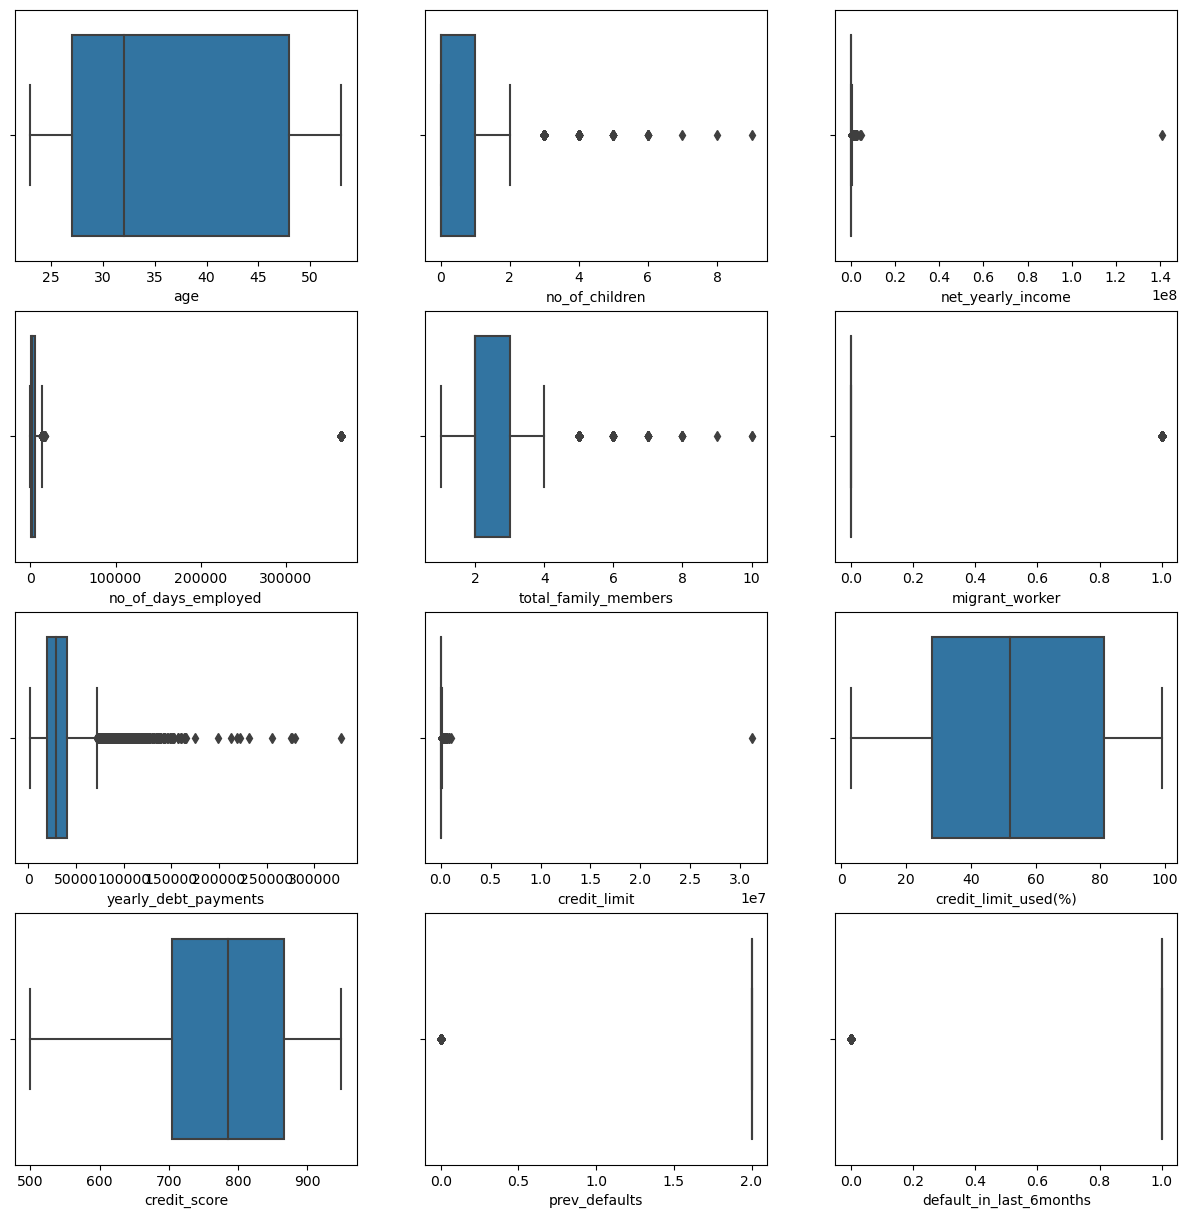

In [20]:
plt.figure(figsize=(15,15))
for i in enumerate(numerical_data.columns):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(data=numerical_data[i[1]], x=numerical_data[i[1]])
    plt.xlabel(i[1])

Outliers: statistical significance -> do some research

look online - data missigness / randomness > do some research

data variability > look and check at this stage

supervised learning: 

classification / regression


time series analysis -> finance people
basic fundamentals - strong fundamentals > more complicate then > time series

In [21]:
for i in (numerical_data[['migrant_worker', 'default_in_last_6months', 'prev_defaults','no_of_children', 'total_family_members']].columns):
        print(numerical_data[i].value_counts())

0.0    37302
1.0     8139
Name: migrant_worker, dtype: int64
0    43227
1     2301
Name: default_in_last_6months, dtype: int64
0    43060
1     2172
2      296
Name: prev_defaults, dtype: int64
0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
7.0        1
8.0        1
9.0        1
Name: no_of_children, dtype: int64
2.0     23455
1.0      9913
3.0      7812
4.0      3623
5.0       564
6.0        57
7.0        12
8.0         6
10.0        2
9.0         1
Name: total_family_members, dtype: int64


In [22]:
for i in (numerical_data[['migrant_worker', 'default_in_last_6months', 'prev_defaults','no_of_children', 'total_family_members']].columns):
        print(str(i), numerical_data[i].unique())

migrant_worker [ 1.  0. nan]
default_in_last_6months [1 0]
prev_defaults [2 0 1]
no_of_children [ 0.  1.  2. nan  3.  4.  5.  6.  7.  8.  9.]
total_family_members [ 1.  2.  3.  4.  5.  6. nan  7.  8.  9. 10.]


After examining the data, I will proceed to input missing values. Since the missing values are a small percentage of the whole data set. I will be using mode and median for numerical and categorical variables, respectively. Applying fillna() and finding the right variable to group by to apply median in the numerical cases.

In [23]:
missing_val.sort_values(by='count', ascending=False)

,count,%
no_of_children,774,1.700053
owns_car,547,1.201458
no_of_days_employed,463,1.016957
yearly_debt_payments,95,0.208663
migrant_worker,87,0.191091
total_family_members,83,0.182305
credit_score,8,0.017572
customer_id,0,0.000000
default_in_last_6months,0,0.000000
prev_defaults,0,0.000000


In [24]:
# input values with mode: no_of_children
amex_df['no_of_children'].fillna(amex_df['no_of_children'].mode()[0], inplace=True)

In [25]:
# input values with mode for 'owns_car'
amex_df['owns_car'].fillna(amex_df['owns_car'].mode()[0], inplace=True)

In [26]:
# input values with mode for 'migrant_worker'
amex_df['migrant_worker'].fillna(amex_df['migrant_worker'].mode()[0], inplace=True)

In [27]:
# input values with mode for 'total_family_members'
amex_df['total_family_members'].fillna(amex_df['total_family_members'].mode()[0], inplace=True)

Replaced the missing values with mode in the categorical variables. Migrant_worker, total_family_members behave as categorical variables as it was seen in the plots and previous analysis. 

In [28]:
# input values with median for numerical no_of_days_employed with occupation type
occupation_days_employed = amex_df.groupby(by='occupation_type')['no_of_days_employed'].median()
occupation_days_employed

occupation_type
Accountants                1822.0
Cleaning staff             1509.0
Cooking staff              1429.5
Core staff                 1883.0
Drivers                    1342.0
HR staff                   1528.0
High skill tech staff      1728.0
IT staff                   1747.0
Laborers                   1687.0
Low-skill Laborers          983.0
Managers                   2118.0
Medicine staff             2826.0
Private service staff      1718.0
Realty agents              1390.0
Sales staff                1276.0
Secretaries                2001.5
Security staff             1419.0
Unknown                  365241.0
Waiters/barmen staff       1258.0
Name: no_of_days_employed, dtype: float64

In [29]:
amex_df['no_of_days_employed'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
45523    False
45524    False
45525    False
45526    False
45527    False
Name: no_of_days_employed, Length: 45528, dtype: bool

In [30]:
# function to deal with missing values in numerical variables. 
def fill_val(median_base, val_to_fill, val_median):
    for i in median_base.index:
        amex_df[val_to_fill] = np.where((amex_df[val_to_fill].isna()) & (val_median == i), median_base[i], amex_df[val_to_fill])

Using the above function to fill the missing values of no_of_days_employed based on the median days per occupation type.

In [31]:
fill_val(occupation_days_employed, 'no_of_days_employed', amex_df['occupation_type'])

Testing the function - Checking for missing val 

In [32]:
amex_df.no_of_days_employed.isna().sum()

0

In [33]:
#checking for null values again in yearly_debt_payments
null_d_yearly_debt = amex_df[amex_df['yearly_debt_payments'].isnull()]
null_d_yearly_debt

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
195,CST_163699,45,F,N,Y,0.0,200314.14,615.0,Security staff,2.0,1.0,NaN,34067.55,78,789.0,0,0,0
253,CST_141322,34,F,N,Y,0.0,141554.19,495.0,Unknown,2.0,0.0,NaN,21871.16,43,842.0,0,0,0
347,CST_130343,33,M,N,Y,3.0,600445.87,2110.0,Managers,5.0,1.0,NaN,148313.03,40,774.0,0,0,0
819,CST_134253,46,M,Y,N,1.0,89229.34,8000.0,Laborers,3.0,0.0,NaN,14702.16,26,934.0,0,0,0
1142,CST_160469,34,M,N,Y,2.0,109526.94,3551.0,Unknown,4.0,1.0,NaN,26312.59,93,945.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42369,CST_149278,53,F,N,N,0.0,199637.58,8973.0,Core staff,2.0,0.0,NaN,28516.93,0,702.0,0,0,0
44289,CST_148637,50,F,N,Y,0.0,81306.27,333.0,Sales staff,2.0,0.0,NaN,15228.92,3,688.0,0,0,0
44570,CST_145386,27,F,Y,Y,0.0,219275.66,498.0,Unknown,1.0,0.0,NaN,40175.36,90,684.0,0,0,0
44954,CST_139801,36,F,N,Y,0.0,121907.22,962.0,Sales staff,2.0,0.0,NaN,36309.82,90,792.0,0,0,0


The variable yearly_debt_payments has less than 0.3% of missing data. It would be possible to use the median or mode of credit_card_default to input these values. It would also work for credit_score, however, I will leave these flagged for later. As I do not want to input bias into the data set by working with 'credit_card_default'.

In [34]:
#checking for missing values again for the amex_df (train data):
amex_df.isna().sum()

customer_id                 0
age                         0
gender                      0
owns_car                    0
owns_house                  0
no_of_children              0
net_yearly_income           0
no_of_days_employed         0
occupation_type             0
total_family_members        0
migrant_worker              0
yearly_debt_payments       95
credit_limit                0
credit_limit_used(%)        0
credit_score                8
prev_defaults               0
default_in_last_6months     0
credit_card_default         0
dtype: int64

##### 1.7 Saving Clean Data<a id='1.7_Saving Clean Data'></a>

The only missing values pending are yearly_debt_payments and credit_score. Both of them are a small percentage of the data set, I will deal with them later. I will save the dataset as the data wrangling is finished for now.

In [36]:
amex_df.head(5)

,customer_id,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [37]:
# saving clean data to CSV 
amex_df.to_csv(r'/Users/camilods16/Documents/Project-2-AmEx-Credit-Card-Default-/Project-2-AmEx-Credit-Card-Default-/data/processed/amex_data.csv')